# Ejercicio 1

In [1]:
# Cargar el corpus
import nltk
from nltk.corpus import cess_esp

corpus_sentences=cess_esp.tagged_sents()
print(corpus_sentences[4])

[('EDF', 'np00000'), ('y', 'cc'), ('Mitsubishi', 'np00000'), ('participaron', 'vmis3p0'), ('en', 'sps00'), ('1998', 'W'), ('en', 'sps00'), ('la', 'da0fs0'), ('licitación', 'ncfs000'), ('de', 'sps00'), ('licencias', 'ncfp000'), ('para', 'sps00'), ('construir', 'vmn0000'), ('centrales', 'ncfp000'), ('eléctricas', 'aq0fp0'), ('en', 'sps00'), ('México', 'np00000'), ('y', 'cc'), ('*0*', 'sn.e-SUJ'), ('se', 'p0300000'), ('quedaron', 'vmis3p0'), ('con', 'sps00'), ('dos', 'pn0cp000'), ('cada', 'di0cs0'), ('una', 'pi0fs000'), (':', 'Fd'), ('Río_Bravo', 'np00000'), ('y', 'cc'), ('Saltillo', 'np00000'), ('para', 'sps00'), ('la', 'da0fs0'), ('compañía', 'ncfs000'), ('francesa', 'aq0fs0'), ('y', 'cc'), ('Altamira', 'np00000'), ('y', 'cc'), ('Tuxpán', 'np00000'), ('para', 'sps00'), ('la', 'da0fs0'), ('japonesa', 'aq0fs0'), ('.', 'Fp')]


In [2]:
new_corpus_sentences = []

for sentence in corpus_sentences:
    new_sentence = []
    
    for taged_word in sentence:
        word, tag = taged_word
        main_category = tag[0]

        if word == '*0*':
            continue

        match main_category:
            case 'v':   # verbo
                new_tag = tag[:3]
            case 'F':   # signo de puntuación
                new_tag = tag[:3]
            case _:     # otro
                new_tag = tag[:2]

        new_sentence.append((word, new_tag))

    new_corpus_sentences.append(new_sentence)

print(corpus_sentences[0])
print(new_corpus_sentences[0])

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'),

In [3]:
corpus_sentences = new_corpus_sentences

# Usar el 90% de frases para el entrenamiento, y el otro 10% como test
len_train = int(len(corpus_sentences) * 0.9)
train_sentences = corpus_sentences[:len_train]
test_sentences = corpus_sentences[len_train:]

print(len(train_sentences))
print(len(test_sentences))

5427
603


# Ejercicio 2

In [4]:
from nltk.tag import hmm
tagger_hmm = hmm.HiddenMarkovModelTagger.train(train_sentences)
accuracy = tagger_hmm.accuracy(test_sentences)
print(f'Acurracy = {accuracy}')

Acurracy = 0.8784427571832664


# Ejercicio 3

In [5]:
from random import shuffle
from dataclasses import dataclass

@dataclass
class Fold:
    train: list
    test: list

len_fold = int(0.1*len(corpus_sentences))

corpus_10fold = [
    Fold(
        corpus_sentences[:len_fold*i] + corpus_sentences[len_fold*(i+1):],
        corpus_sentences[len_fold*i : len_fold*(i+1)],  
    )
    for i in range(10)
]

shuffle(corpus_10fold)

for fold in corpus_10fold:
    print(f'len_train={len(fold.train)}\t{fold.train[0]}\t')
    print(f'len_test={len(fold.test)}\t{fold.test[0]}\t')
    print()
   

len_train=5427	[('Con', 'sp'), ('la', 'da'), ('compra', 'nc'), ('de', 'sp'), ('acciones', 'nc'), ('en', 'sp'), ('CGO', 'np'), (',', 'Fc'), ('Autopistas_Concesionaria_Española', 'np'), ('-Fpa-', 'Fpa'), ('ACESA', 'np'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('filial', 'nc'), ('del', 'sp'), ('grupo', 'nc'), ('financiero', 'aq'), ('catalán', 'aq'), ('La_Caixa', 'np'), ('y', 'cc'), ('que', 'pr'), ('constituye', 'vmi'), ('la', 'da'), ('mayor', 'aq'), ('operadora', 'nc'), ('de', 'sp'), ('rutas', 'nc'), ('con', 'sp'), ('peajes', 'nc'), ('de', 'sp'), ('España', 'np'), (',', 'Fc'), ('presente', 'aq'), ('también', 'rg'), ('en', 'sp'), ('Portugal', 'np'), ('e', 'cc'), ('Italia', 'np'), (',', 'Fc'), ('pone', 'vmi'), ('un', 'di'), ('pie', 'nc'), ('en', 'sp'), ('Latinoamérica', 'np'), ('.', 'Fp')]	
len_test=603	[('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W')

In [6]:
accuracy_scores = [hmm.HiddenMarkovModelTagger.train(fold.train).accuracy(fold.test) for fold in corpus_10fold]

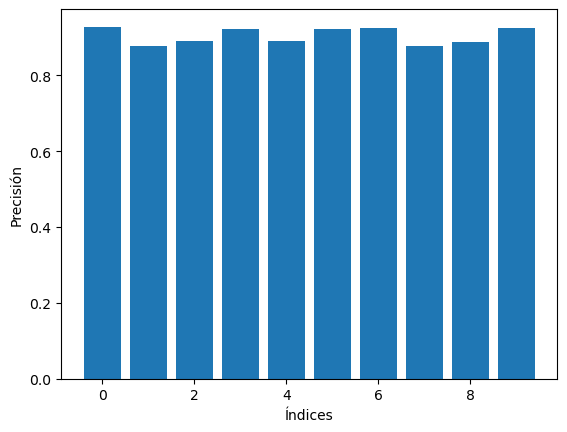

mean accuracy = 0.9049859134368964


In [7]:
import matplotlib.pyplot as plt

plt.bar(range(10), accuracy_scores)
plt.xlabel('Índices')
plt.ylabel('Precisión')
plt.show()

mean = sum(accuracy_scores)/10
print(f'mean accuracy = {mean}')

Usando validación cruzada se ha obtenido un 90% de precisión, en cambio usando sin ella se ha obtenido un 87%, demostrando que se obtiene un ligera mejoría usando validación cruzada